In [1]:
import xarray as xr

import pymc as pymc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import arviz as az
import pytensor.tensor as pt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
infilename = "X:/Projects/DPE_Headroom/Data/BoM_Incoming/aggregated_rain_QC.nc"

indata = xr.open_dataset(infilename)


In [3]:
indata

<xarray.Dataset> Size: 187MB
Dimensions:       (time: 139078, station: 335)
Coordinates:
  * time          (time) datetime64[ns] 1MB 2007-01-29T23:00:00 ... 2022-12-1...
    station_name  (station) |S30 10kB ...
    station_id    (station) int32 1kB ...
Dimensions without coordinates: station
Data variables:
    rain_obs      (time, station) float32 186MB ...
    lat           (station) float32 1kB ...
    lon           (station) float32 1kB ...
Attributes:
    comment:                 Data prepared for CSIRO for the Headroom project...
    STF_convention_version:  1.0
    title:                   Observed rainfall station time-series data from ...
    catchment:               
    source:                  Australian Bureau of Meteorology - Australian In...
    STF_nc_spec:             http://www.bom.gov.au/water/7daystreamflow/publi...
    institution:             Australian Bureau of Meteorology
    history:                 2022-12-12 03:00:21 - Created using python stfio...
    region:                  VIC

In [4]:
indata['station_id'].values

array([ 70008,  80091,  81049,  81087,  81123,  81124,  81125,  82031,
        82039,  82043,  82084,  82105,  82112,  82116,  82128,  82134,
        82138,  82139,  82140,  82142,  82143,  82144,  82145,  82146,
        82147,  82148,  82149,  82151,  82153,  82154,  82155,  82156,
        82157,  82158,  82162,  82163,  82165,  82166,  82167,  83000,
        83001,  83024,  83055,  83058,  83073,  83074,  83077,  83084,
        83085,  83090,  83093,  83094,  84097,  84109,  84118,  84126,
        84142,  84144,  84145,  84147,  84152,  85021,  85270,  85276,
        85279,  85288,  85289,  85291,  85296,  85302,  85303,  85304,
        86038,  86068,  86071,  86077,  86104,  86266,  86282,  86338,
        86347,  86372,  86383,  87016,  87021,  87031,  87068,  87168,
        88010,  88051,  88064,  88071,  88103,  88109,  88119,  88126,
        88154,  88158,  88162,  88164, 572036, 580010, 580017, 580022,
       581001, 581006, 581008, 581009, 581010, 581011, 581017, 581018,
      

In [5]:
obsrain = indata['rain_obs']

In [6]:
timerange = pd.date_range("2022-01-01", freq="1h", periods=365 * 1)

In [7]:
ds = obsrain.sel(time=slice("2022-01-01", "2022-12-31"))

In [8]:
useful_stations = np.where(np.isfinite(ds).any(dim = 'time'))

In [9]:
useful_stations = np.isfinite(ds).any(dim = 'time')
useful_stations

<xarray.DataArray 'rain_obs' (station: 335)> Size: 335B
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])
Coordinates:
    station_name  (station) |S30 10kB ...
    station_id    (station) int32 1kB 70008 80091 81049 ... 574005 574036 574041
Dimensions without coordinates: station

In [ ]:
useful_stations']

KeyError: 'rain_obs'

In [27]:
used_Stations = useful_stations.isel({'station':np.where(useful_stations)[0]})

In [33]:
used_Stations['station_id']

<xarray.DataArray 'station_id' (station: 319)> Size: 1kB
array([ 70008,  80091,  81049, ..., 574005, 574036, 574041])
Coordinates:
    station_name  (station) |S30 10kB b'070008-1                      ' ... b...
    station_id    (station) int32 1kB 70008 80091 81049 ... 574005 574036 574041
Dimensions without coordinates: station
Attributes:
    long_name:  station or node identification code

In [12]:
invic = pd.read_csv("X:/Projects/DPE_Headroom/Data/VIC_rain.txt")
innsw = pd.read_csv("X:/Projects/DPE_Headroom/Data/NSW_rain.txt")

In [14]:
innsw

,FID,HYFS_SENSO,LAT,LONG,SHORT_NAME,NAME,HYFS_STATI,STATE,REGION,SENSOR_CLO,SENSOR_TYP,GAUGE_OFFS,GAUGE_DATU,P_REPORT_T,TELEMETRY_,DATA_SOURC
0,625,H070091-02,-34.8313,148.9113,Yass,Yass (Linton Hostel),H070091,NSW,NSW,,rain gauge;,,,24h,MAN,MAN
1,631,H070217-02,-36.2939,148.9725,Cooma AP,Cooma Airport Aws,H070217,NSW,NSW;VIC,,rain gauge;,,,15m,AWS,AWS
2,640,H070349-03,-35.5293,148.7721,Mount Ginini,Mount Ginini Aws,H070349,NSW,NSW,,rain gauge;,,,1h,AWS,AWS
3,641,H070350-01,-35.2063,149.0113,Charnwood,Charnwood (Act),H070350,NSW,NSW,,rain gauge;,,,15m,FTP,bom091
4,644,H071019-01,-36.5067,148.8281,Dalgety Weir,Snowy River @ Dalgety Weir,H071019,NSW,NSW;VIC,,rain gauge;water level gauge;,,LGH,15m,FTP,bom376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1250,H573016-01,-35.0507,148.4145,Adjungbilly,Adjungbilly,H573016,NSW,NSW,,rain gauge;,,,15m,FTP,bom376
64,1251,H573017-01,-34.5957,148.0178,Berthong Road,Berthong Road (Muttama Creek),H573017,NSW,NSW,,rain gauge;water level gauge;,,LGH,15m,FTP,bom376
65,1252,H574005-02,-36.0083,145.9983,Yarrawonga HG,Yarrawonga Weir Hg,H574005,NSW,NSW;VIC,,rain gauge;,,,15m,FTP,bom569
66,1253,H574036-01,-35.0625,147.1194,Mundowey,Beavers Ck At Mundowey,H574036,NSW,NSW,,rain gauge;water level gauge;,,LGH,15m,FTP,bom376


In [13]:
invic

,FID,HYFS_STATI,LAT,LONG,SHORT_NAME,NAME,STATE,REGION,RIVERSTN_I,BASIN_NAME,...,Q_ALT2_HYF,P_ALT3_HYF,H_ALT3_HYF,Q_ALT3_HYF,STATION_OR,H_MANUAL_O,SQ_OFFSET_,VIEWPERIOD,PRODUCT,AAC
0,0,H070008,-36.8414,148.9314,Burnt Hut Crossing,Snowy River @ Burnt Hut Crossing,VIC,NSW;VIC,222013.0,SNOWY RIVER,...,,,,,100.0,,,default,report,
1,39,H080042,-36.0591,145.2031,Nathalia (Post Offic,Nathalia (Post Office),VIC,VIC,0.0,BROKEN RIVER,...,,,,,0.0,,,,,
2,41,H080065,-35.9258,145.5560,Yarroweyah,Yarroweyah,VIC,VIC,0.0,BROKEN RIVER,...,,,,,0.0,,,,,
3,43,H080091,-36.3350,145.0638,Kyabram,Kyabram,VIC,VIC,0.0,GOULBURN RIVER,...,,,,,0.0,,,default,,
4,44,H080101,-36.0921,145.4531,Numurkah,Numurkah,VIC,VIC,0.0,BROKEN RIVER,...,,,,,0.0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,459,H588034,-37.4075,144.3560,Trentham Reservoir,Trentham Reservoir,VIC,VIC,0.0,CAMPASPE RIVER,...,,,,,0.0,,,default,,
285,460,H588035,-37.3199,144.3646,Coliban River Spring,Coliban River Springhill Road,VIC,VIC,0.0,CAMPASPE RIVER,...,,,,,0.0,,,default,,
286,461,H588126,-37.1000,145.0667,Tallarook,Sunday Creek @ Tallarook,VIC,VIC,405212.0,GOULBURN RIVER,...,,,,,0.0,,,default,report,
287,462,H588127,-37.1517,146.1250,Tonga Bridge,Delatite River @ Tonga Bridge,VIC,VIC,405214.0,GOULBURN RIVER,...,,,,,3170.0,,,default,report,


In [17]:
invic[['HYFS_STATI','LAT','LONG','SHORT_NAME','NAME']]

,HYFS_STATI,LAT,LONG,SHORT_NAME,NAME
0,H070008,-36.8414,148.9314,Burnt Hut Crossing,Snowy River @ Burnt Hut Crossing
1,H080042,-36.0591,145.2031,Nathalia (Post Offic,Nathalia (Post Office)
2,H080065,-35.9258,145.5560,Yarroweyah,Yarroweyah
3,H080091,-36.3350,145.0638,Kyabram,Kyabram
4,H080101,-36.0921,145.4531,Numurkah,Numurkah
...,...,...,...,...,...
284,H588034,-37.4075,144.3560,Trentham Reservoir,Trentham Reservoir
285,H588035,-37.3199,144.3646,Coliban River Spring,Coliban River Springhill Road
286,H588126,-37.1000,145.0667,Tallarook,Sunday Creek @ Tallarook
287,H588127,-37.1517,146.1250,Tonga Bridge,Delatite River @ Tonga Bridge


In [18]:
merge_sites = pd.concat([invic[['HYFS_STATI','LAT','LONG','SHORT_NAME','NAME']], innsw[['HYFS_STATI','LAT','LONG','SHORT_NAME','NAME']]])

In [21]:
merge_sites

,HYFS_STATI,LAT,LONG,SHORT_NAME,NAME
0,H070008,-36.8414,148.9314,Burnt Hut Crossing,Snowy River @ Burnt Hut Crossing
1,H080042,-36.0591,145.2031,Nathalia (Post Offic,Nathalia (Post Office)
2,H080065,-35.9258,145.5560,Yarroweyah,Yarroweyah
3,H080091,-36.3350,145.0638,Kyabram,Kyabram
4,H080101,-36.0921,145.4531,Numurkah,Numurkah
...,...,...,...,...,...
63,H573016,-35.0507,148.4145,Adjungbilly,Adjungbilly
64,H573017,-34.5957,148.0178,Berthong Road,Berthong Road (Muttama Creek)
65,H574005,-36.0083,145.9983,Yarrawonga HG,Yarrawonga Weir Hg
66,H574036,-35.0625,147.1194,Mundowey,Beavers Ck At Mundowey


In [24]:
short_merge = merge_sites.drop_duplicates(subset = 'HYFS_STATI', keep='first')

<Axes: xlabel='LONG', ylabel='LAT'>

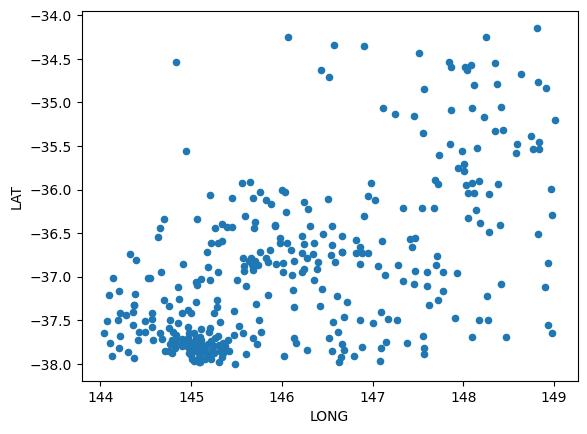

In [27]:
short_merge.plot.scatter(x = 'LONG', y = 'LAT')

In [28]:
short_merge.to_csv('X:/Projects/DPE_Headroom/Data/stations_for_extraction.csv')